In [3]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
x,y = make_regression(n_samples=100 , n_features =2 ,n_informative=2 , n_targets=1 , noise=50)

In [11]:
df = pd.DataFrame({'feature1':x[:,0] , 'feature2':x[:,1],'target':y})
df.shape

(100, 3)

In [9]:
df.head()

,feature1,feature2,target
0,-1.195950,-1.236934,-145.163658
1,1.280446,-2.162340,-116.268649
2,0.020044,-1.162226,-72.014472
3,1.504899,-1.356747,16.972100
4,-1.472337,0.752134,37.226918


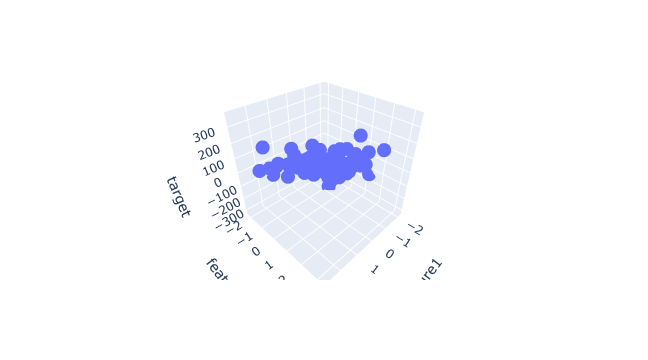

In [18]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')

fig.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =3)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [36]:
print("MAE" , mean_absolute_error(y_test,y_pred))
print("MSE" , mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

MAE 34.04261842318971
MSE 1823.4017400276098
r2 score 0.8755449514875864


In [58]:
import numpy as np

# Step 1: Create grid
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(x, y)

# Step 2: Make feature matrix for prediction
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T   # shape (100, 2)

# Step 3: Predict on grid (NOT y_pred)
z_final = lr.predict(final).reshape(10, 10)


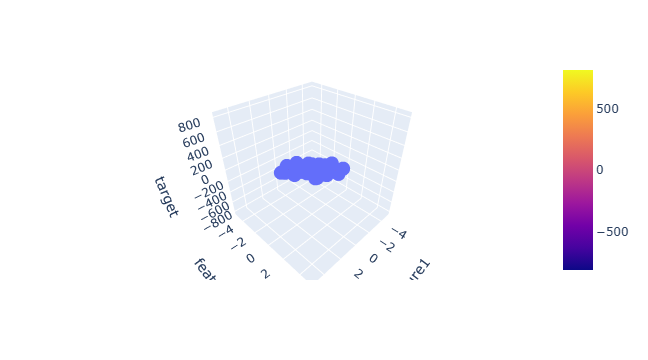

In [62]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z_final ))

fig.show()

In [66]:
lr.coef_

array([83.19824981, 79.51994214])

In [68]:
lr.intercept_

2.185461622026601